# Song Popularity Prediction using Backpropagation

## Topic

Humans have greatly associated themselves with Songs & Music. It can improve mood, decrease pain and anxiety, and facilitate opportunities for emotional expression. Research suggests that music can benefit our physical and mental health in numerous ways.

Lately, multiple studies have been carried out to understand songs & it's popularity based on certain factors. Such song samples are broken down & their parameters are recorded to tabulate. Predicting the Song Popularity is the main aim.

The project is simple yet challenging, to predict the song popularity based on energy, acoustics, instumentalness, liveness, dancibility, etc. 

In this notebook I will attempt to build a neural network that can predict the popularity of a song based on its features. It is a regression problem and I have a continuous value for a target.

## Objective

- Build a regressor able to predict the popularity of a song 

### Summary

- Importing libraries
- The Dataset
- Train/Test split
- Building the model
- Training and inference
- Trying out the model
- Conclusion

### Importing libraries

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import numpy as np 
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing

### The Dataset

In [101]:
data = pd.read_csv(r'C:\Users\imane\Downloads\archive (13)\song_data.csv', sep =",", encoding='unicode_escape')
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [103]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


array([[<Axes: title={'center': 'song_popularity'}>,
        <Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >]],
      dtype=object)

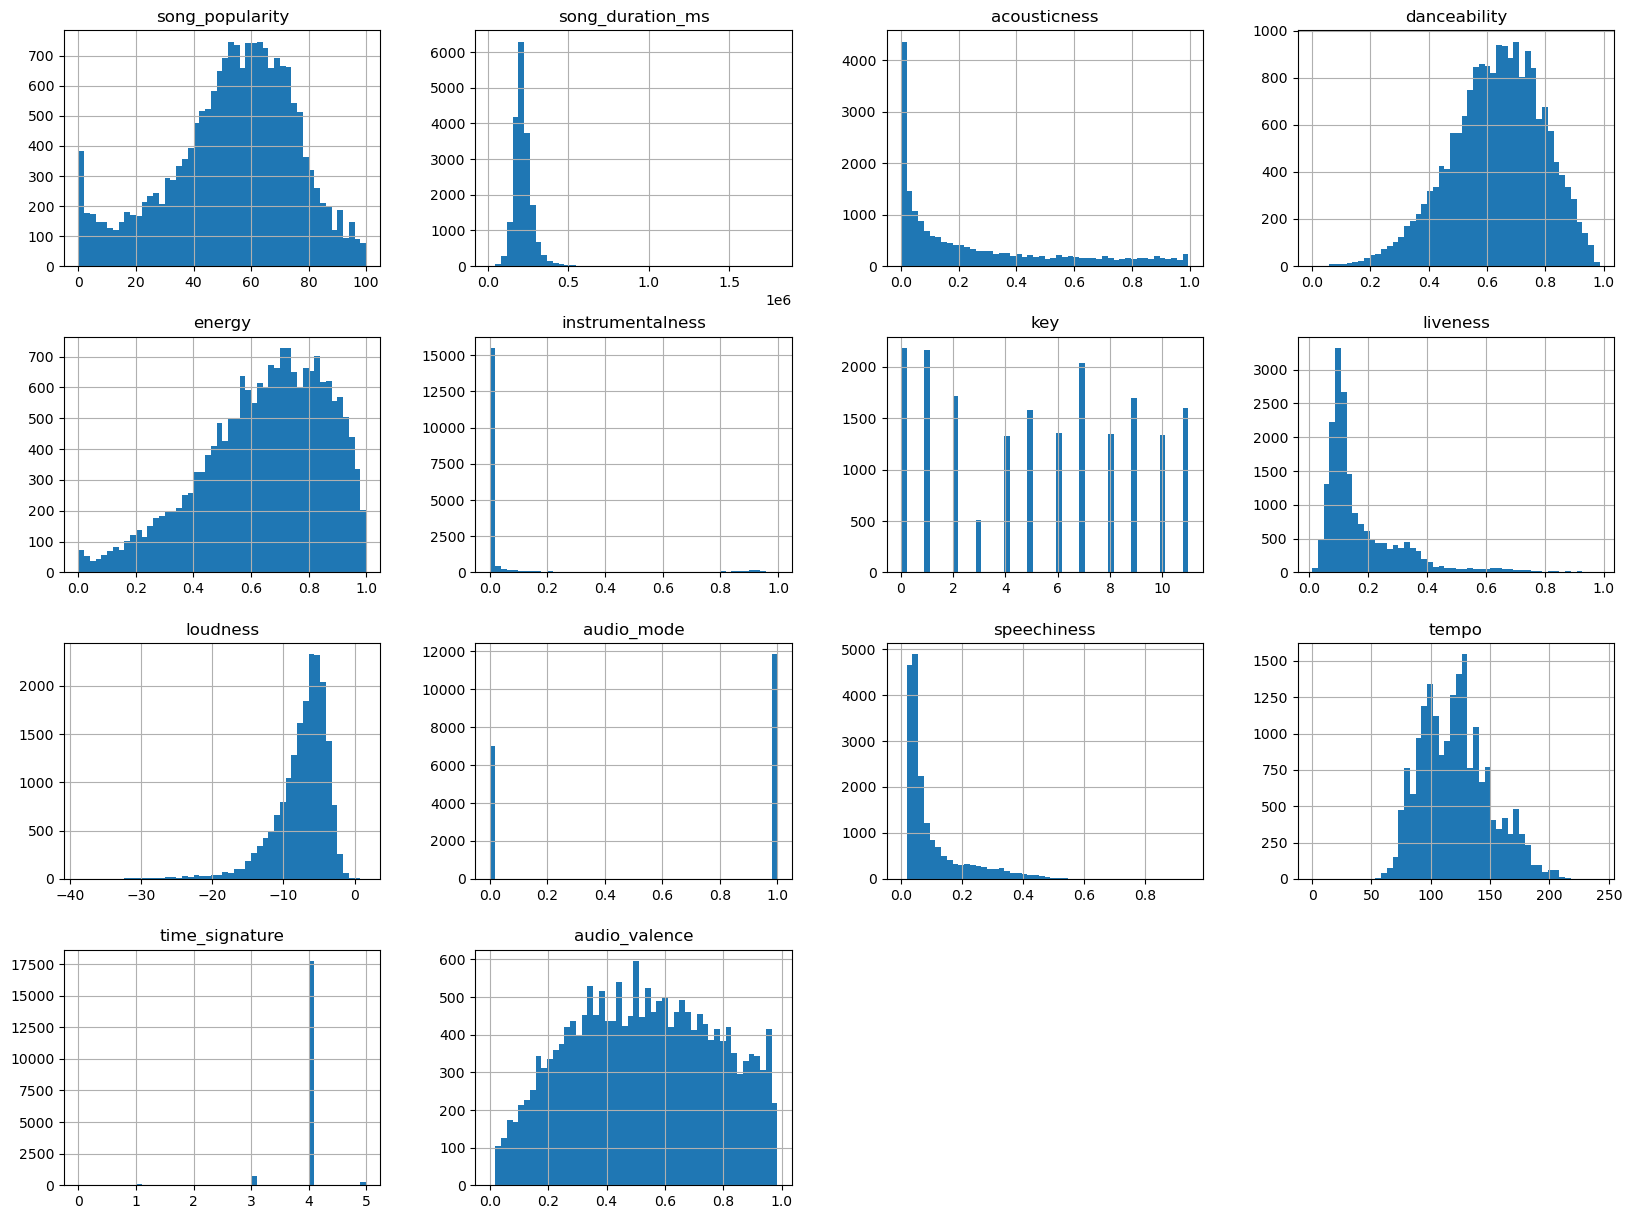

In [104]:
data.hist(bins=50, figsize = (20,15))

C:\Users\imane\AppData\Local\Temp\ipykernel_14496\1679999493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

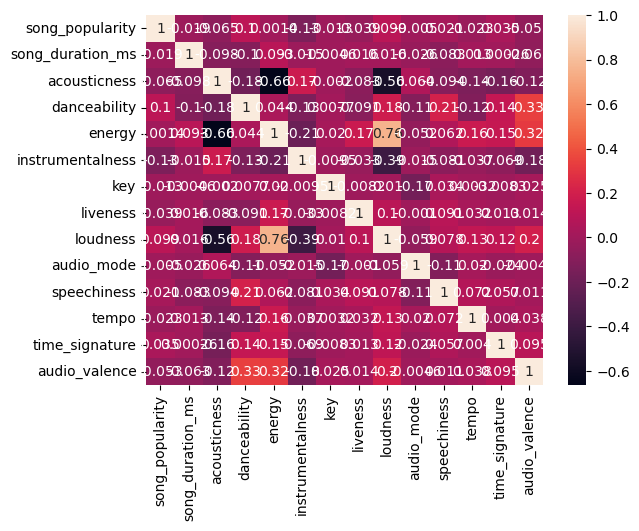

In [105]:
sns.heatmap(data.corr(), annot = True)

In [106]:
names = data["song_name"]
target = data["song_popularity"]
data = data.drop(columns=["song_name", "song_popularity"])

In [107]:
scaler = preprocessing.StandardScaler().fit(data)

In [108]:
scaled = scaler.transform(data)

In [109]:
len(scaled[0])

13

In this part I imported the dataset that contains 18835 instances of songs and their features such as accousticness, danceabilty, duration etc, I checked the distribution of the feautures and their correlation. Distributions seem to be normal and the target has a normal dotribution as well.

### Train/Test split

In [110]:
X_train, X_test, y_train ,y_test = train_test_split(scaled, target, random_state = 42, test_size = 0.30)

In [111]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [112]:
class Train_loader(Dataset):
    def __init__(self):
        self.X = torch.tensor(X_train, dtype= torch.float32)
        self.Y = torch.tensor(y_train, dtype = torch.float32)
        self.len = self.X.shape[0]
    def __getitem__(self, index):
        return self.X[index], self.Y[index]
    def __len__(self):
        return self.len

In [113]:
class Test_loader(Dataset):
    def __init__(self):
        self.X = torch.tensor(X_test, dtype = torch.float32)
        self.Y = torch.tensor(y_test,dtype = torch.float32)
        self.len = self.X.shape[0]
    def __getitem__(self, index):
        return self.X[index], self.Y[index]
    def __len__(self):
        return self.len

In [114]:
train_data = Train_loader()
test_data = Test_loader()

In [115]:
train_loader = DataLoader(dataset = train_data, batch_size= 64)
test_loader = DataLoader(dataset = test_data, batch_size= 64)

In here I created the train and test loaders and chose an optimized batch size of 64.

### Building the Model

In [116]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
            
        self.fc1 = nn.Linear(13, 7)
        self.fc2 = nn.Linear(7, 3)
        self.fc3 = nn.Linear(3, 1)
            
        self.dropout = nn.Dropout(0.2)
        self.batchn1 = nn.BatchNorm1d(7)
        self.batchn2 = nn.BatchNorm1d(3)
            
    def forward(self, x):
            
        x = self.dropout(F.relu(self.batchn1(self.fc1(x))))
        x = self.dropout(F.relu(self.batchn2(self.fc2(x))))
        x = F.relu(self.fc3(x))
            
        return x
            

In [117]:
model = Model()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.0005)

In the above I built a simple model containing 3 layers, I used Relu as an activation function for all layers with a dropout of 0.2 and batch normalization. I used Root mean error as a loss measure ans Stochatic Gradient Descent as an optimizer

### Training and inference

In [123]:
epochs = 30
train_loss, test_loss = [],[]
train_accuracy, test_accuracy = [],[]

for epoch in range(epochs):
    t_loss = 0
    
    for instance, label in train_loader:
        optimizer.zero_grad()
        logits = model(instance)
        loss = criterion(logits, label)
        t_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    else:
        v_loss = 0
        with torch.no_grad():
            model.eval()
            for instance, label in test_loader:
                logits = model(instance)
                loss = criterion(logits, label)
                v_loss += loss.item()
        
        train_loss.append(t_loss/len(train_loader.dataset))
        test_loss.append(v_loss/len(test_loader.dataset))
        model.train()
        
        print("Epoch", epoch+1, "Test loss", test_loss[epoch])
        

Epoch 1 Test loss 7.688017805157204
Epoch 2 Test loss 7.79162751567235
Epoch 3 Test loss 7.785784962872998
Epoch 4 Test loss 7.76492426218638
Epoch 5 Test loss 7.76312722452677
Epoch 6 Test loss 7.768763390795739
Epoch 7 Test loss 7.769626469596089
Epoch 8 Test loss 7.760443637991686
Epoch 9 Test loss 7.754442432668858
Epoch 10 Test loss 7.761666528272789
Epoch 11 Test loss 7.741820360196204
Epoch 12 Test loss 7.754468305915505
Epoch 13 Test loss 7.75609137555853
Epoch 14 Test loss 7.749723008830364
Epoch 15 Test loss 7.744912475089102
Epoch 16 Test loss 7.746072207862477
Epoch 17 Test loss 7.738582586107202
Epoch 18 Test loss 7.734976543533846
Epoch 19 Test loss 7.743960694957889
Epoch 20 Test loss 7.736543800193343
Epoch 21 Test loss 7.74112091847509
Epoch 22 Test loss 7.734467184579471
Epoch 23 Test loss 7.734989968892052
Epoch 24 Test loss 7.731472087611015
Epoch 25 Test loss 7.730801246331194
Epoch 26 Test loss 7.73348214347433
Epoch 27 Test loss 7.720383071156861
Epoch 28 Test lo

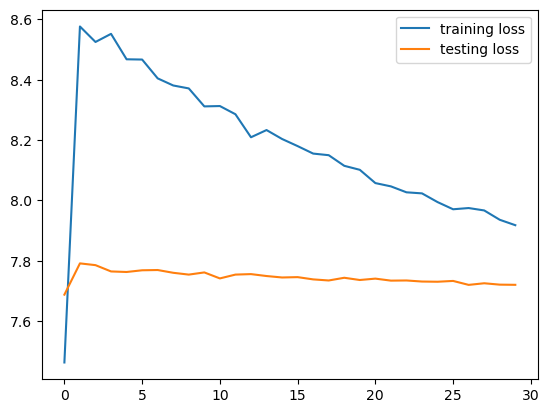

In [124]:
plt.plot(train_loss, label="training loss")
plt.plot(test_loss, label="testing loss")
plt.legend()

In the above I trained the model and kept track of its validation performance, I can see that the error on the test set is much lower than the error on the training set, but throught more training I couldn't get it less that 6.99.

### Trying out the model

In [125]:
model.eval()
song = names[5]
print("Song: ", song)
instance, label = next(iter(train_loader))
s = instance[5]
s = s.view(1, s.shape[0])
with torch.no_grad():
    output = model(s)
print("Actual popularity", label[5])
print("predicted popularity", output)

Song:  Bring Me To Life
Actual popularity tensor(53.)
predicted popularity tensor([[51.4055]])


In [126]:
model.eval()
song = names[15]
print("Song: ", song)
instance, label = next(iter(train_loader))
s = instance[15]
s = s.view(1, s.shape[0])
with torch.no_grad():
    output = model(s)
print("Actual popularity", label[15])
print("predicted popularity", output)

Song:  Take Me Out
Actual popularity tensor(51.)
predicted popularity tensor([[51.4436]])


In [127]:
model.eval()
song = names[21]
print("Song: ", song)
instance, label = next(iter(train_loader))
s = instance[21]
s = s.view(1, s.shape[0])
with torch.no_grad():
    output = model(s)
print("Actual popularity", label[21])
print("predicted popularity", output)

Song:  Use Somebody
Actual popularity tensor(59.)
predicted popularity tensor([[51.4260]])


The validation process shows that the predictions of the model are very close to the actual labels, and seen as the model doesn't overfit I can safely say that this model is suitable for thsi dataset.

### Conclusion

In this notebook I had the chance to experiment with regression, I chose a dataset for which I need to predict a continous value which is the popularity of a song based on features like loudness, danceability, accousticness ... I created a simple neural net and used forward and backpropation to train the model and could achieve an error as low as 7.72. The validation step revealed that the model's predictions are close to the actual labels.